# Oriented FAST and Rotated BRIEF (ORB)

<img src='' />

ORB is a very fast algorithm that creates feature vectors from detected keypoints. 

### Loading Images and Importing Resources

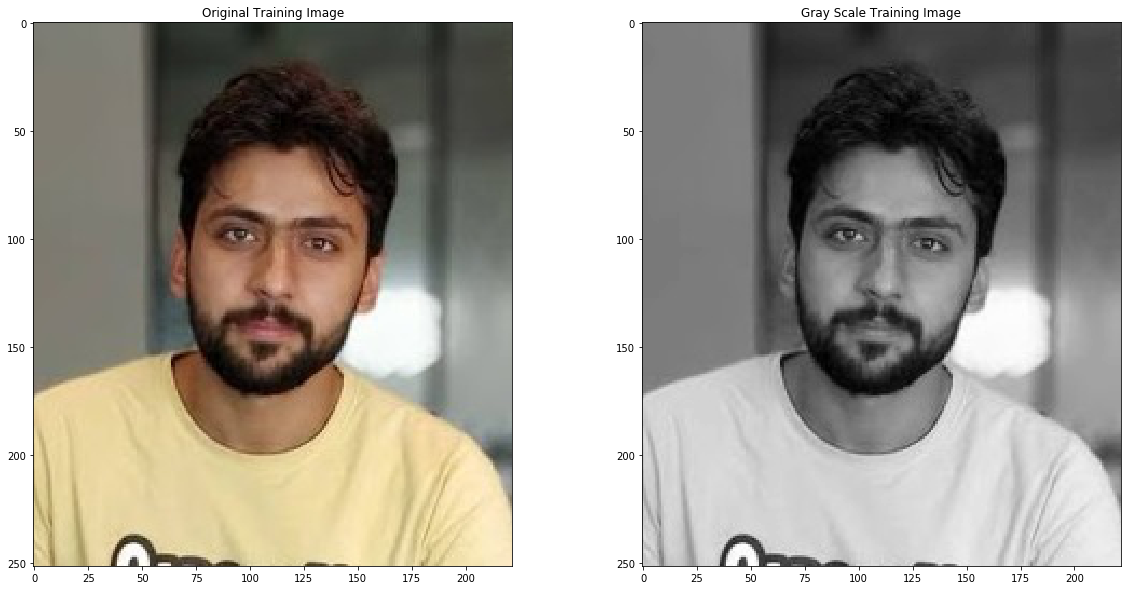

In [1]:
import copy
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Set the default figure size
plt.rcParams['figure.figsize'] = [20,10]

# Load the image
image = cv2.imread('./images/photo.jpg')
# Convert the image to RGB
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convert the image to gray Scale
training_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the images
plt.subplot(121)
plt.title('Original Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Gray Scale Training Image')
plt.imshow(training_gray, cmap = 'gray')
plt.show()

### Locating Keypoints

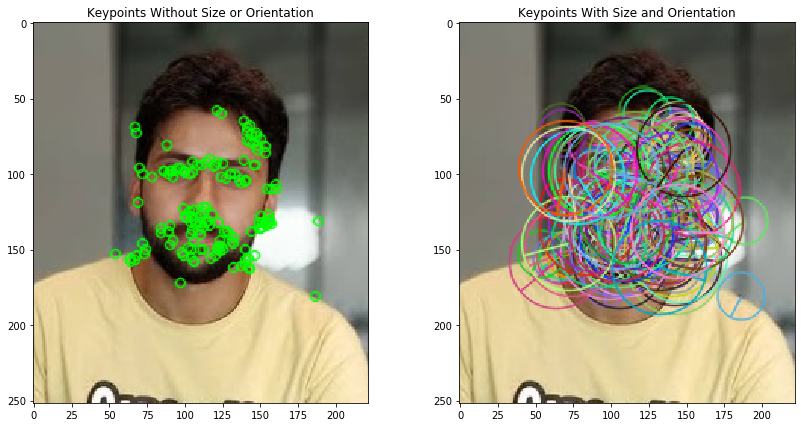


Number of keypoints Detected:  150


In [2]:
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# ORB algorithm ( maximum number of keypoints to locate , pyramid decimation ratio)
orb = cv2.ORB_create(200, 2.0)

#  'None' parameter = not using a mask.
keypoints, descriptor = orb.detectAndCompute(training_gray, None)
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

# Draw the keypoints on image 
cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color = (0, 255, 0))
# Draw the keypoints with size and orientation on the other copy of image
cv2.drawKeypoints(training_image, keypoints, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.subplot(121)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)
plt.subplot(122)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

print("\nNumber of keypoints Detected: ", len(keypoints))

### Feature Matching

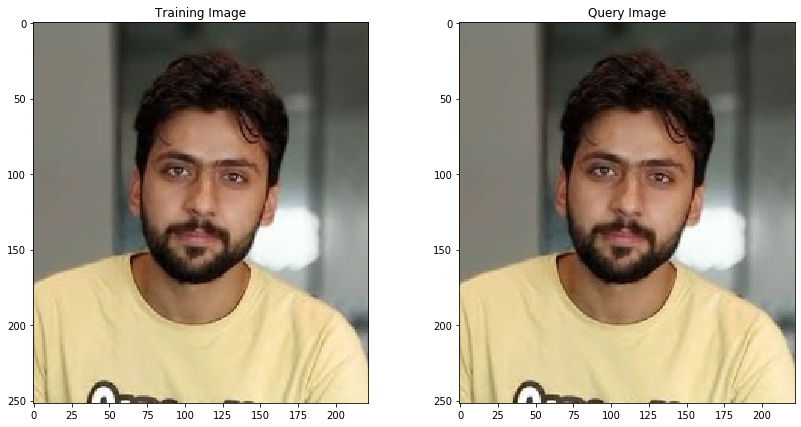

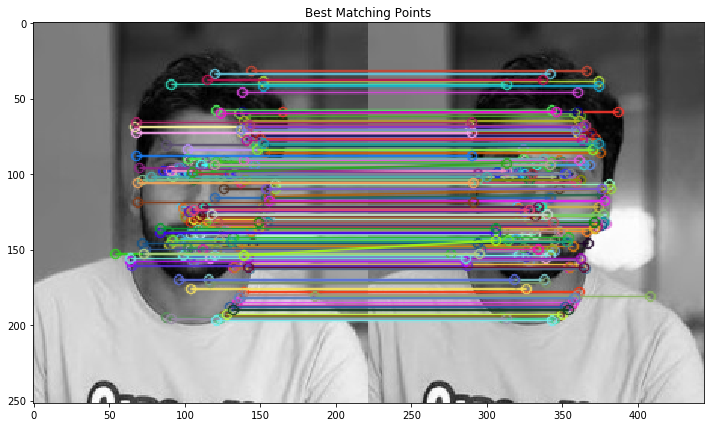

Number of Keypoints Detected In The Training Image:  230
Number of Keypoints Detected In The Query Image:  215

Number of Matching Keypoints Between The Training and Query Images:  194


In [3]:

# Load the query image
image2 = cv2.imread('./images/photo.jpg')

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_image)
plt.show()

orb = cv2.ORB_create(1000, 2.0)

keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)
# crossCheck = True: BFMatcher will only return consistent pairs.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(descriptors_train, descriptors_query)
# sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:300], query_gray, flags = 2)

plt.title('Best Matching Points')
plt.imshow(result)
plt.show()


print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

 ORB has found the same number of keypoints in both images and the Brute-Force matcher has been able to correctly match all the
 keypoints in training and query images

## Object Detection

We will now implement the ORB algorithm to detect the face in the training image in another image

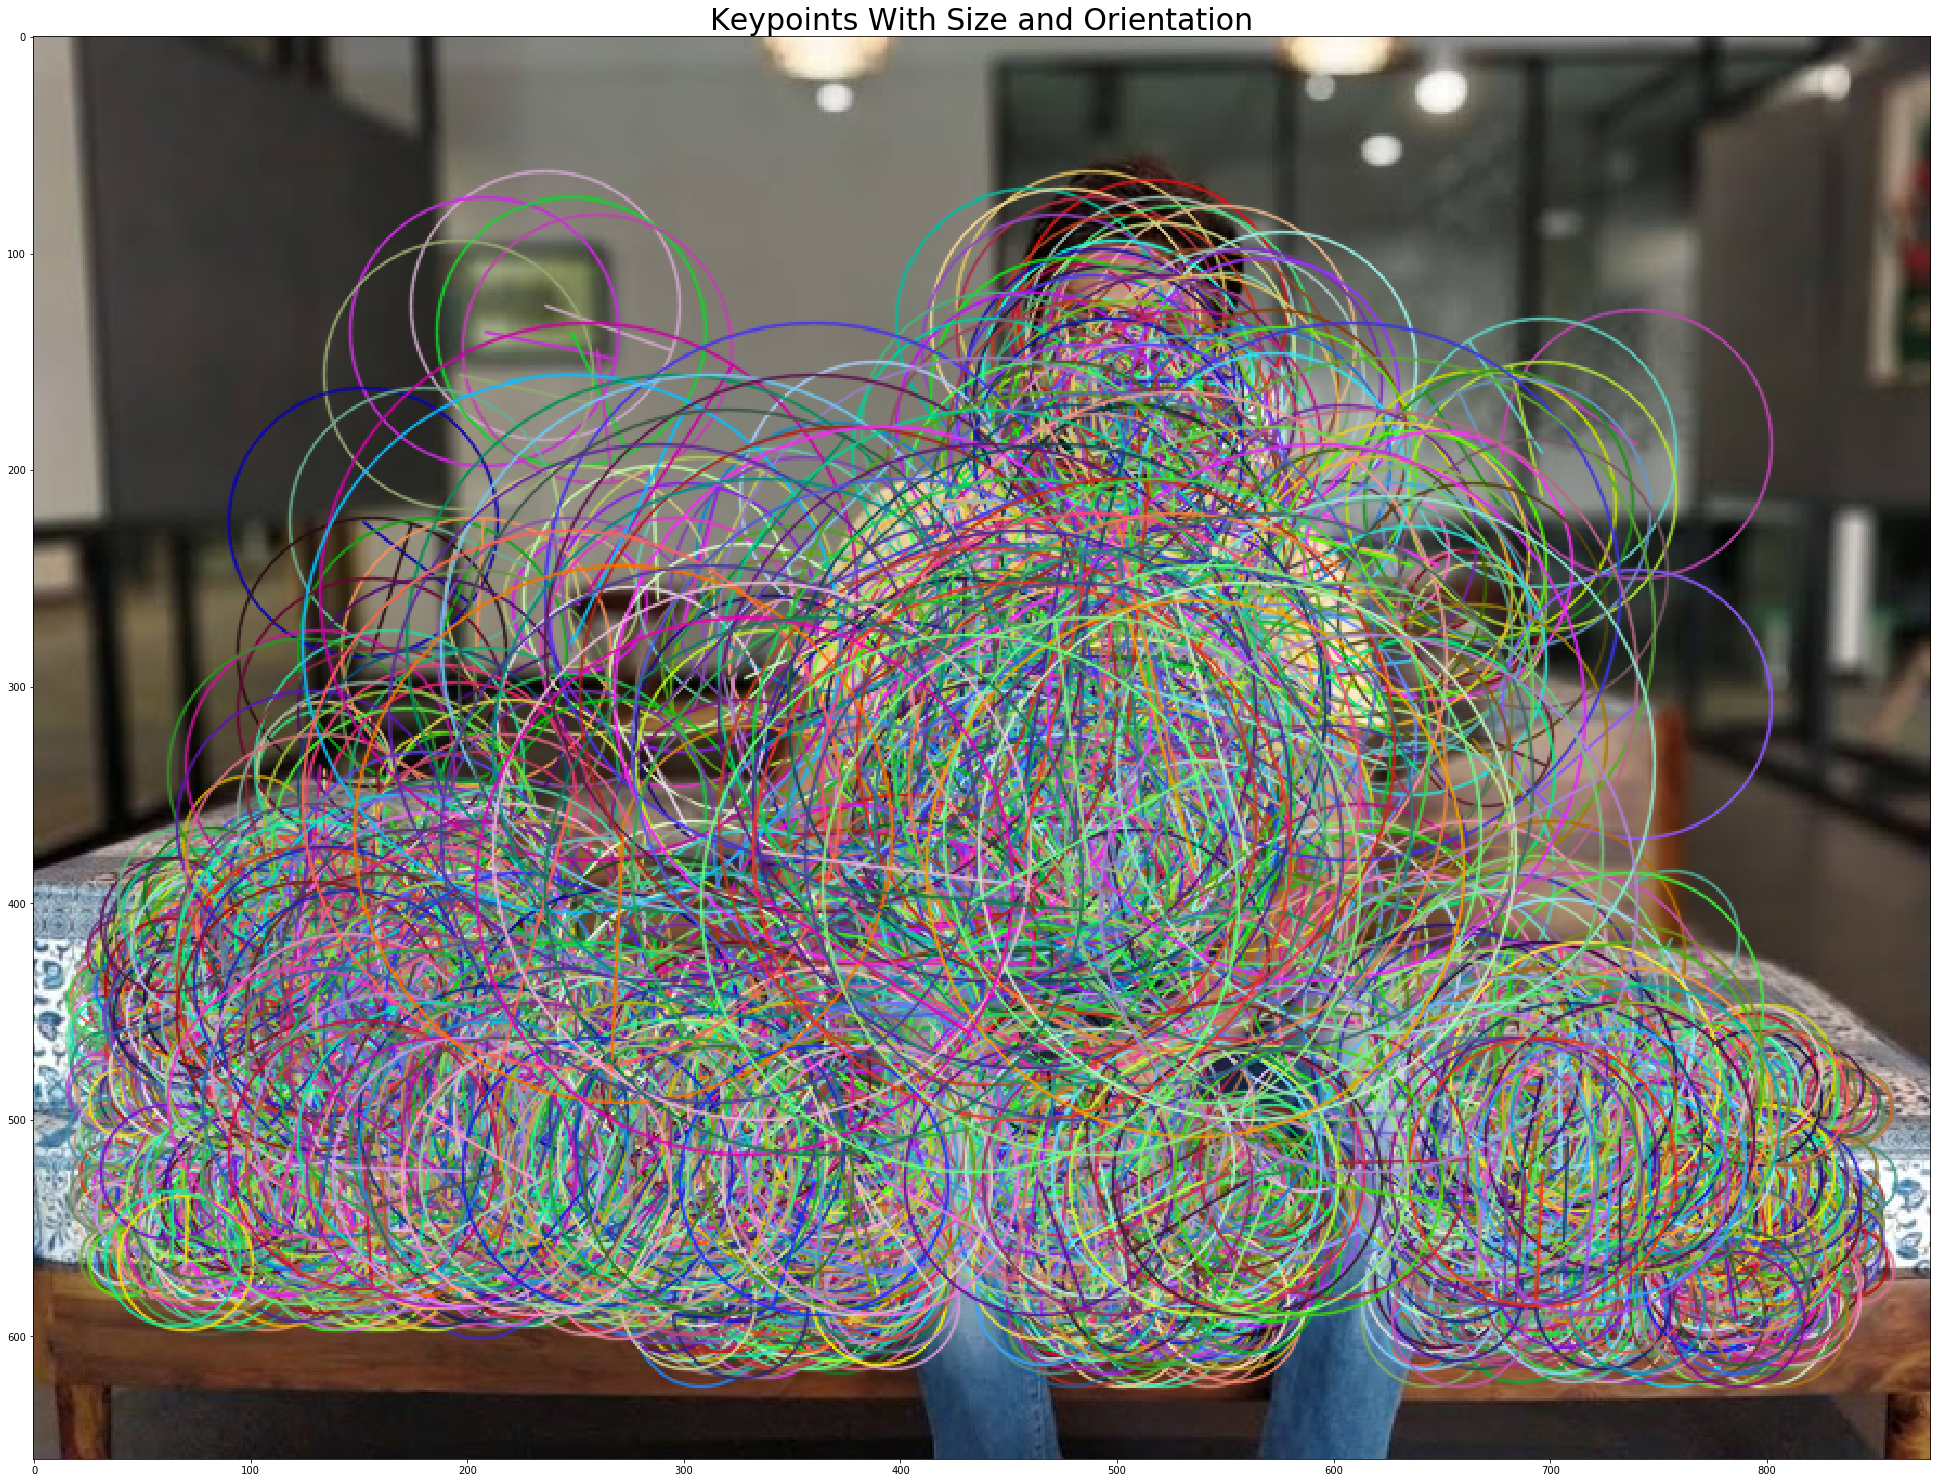


Number of keypoints Detected:  4251


In [4]:
image2 = cv2.imread('./images/photo_query.jpg')
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.rcParams['figure.figsize'] = [34.0, 34.0]

query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(5000, 2.0)
 
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

query_img_keyp = copy.copy(query_image)

cv2.drawKeypoints(query_image, keypoints_query, query_img_keyp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.title('Keypoints With Size and Orientation', fontsize = 30)
plt.imshow(query_img_keyp)
plt.show()

print("\nNumber of keypoints Detected: ", len(keypoints_query))

#### Brute-Force matcher to try to locate the face in the image.

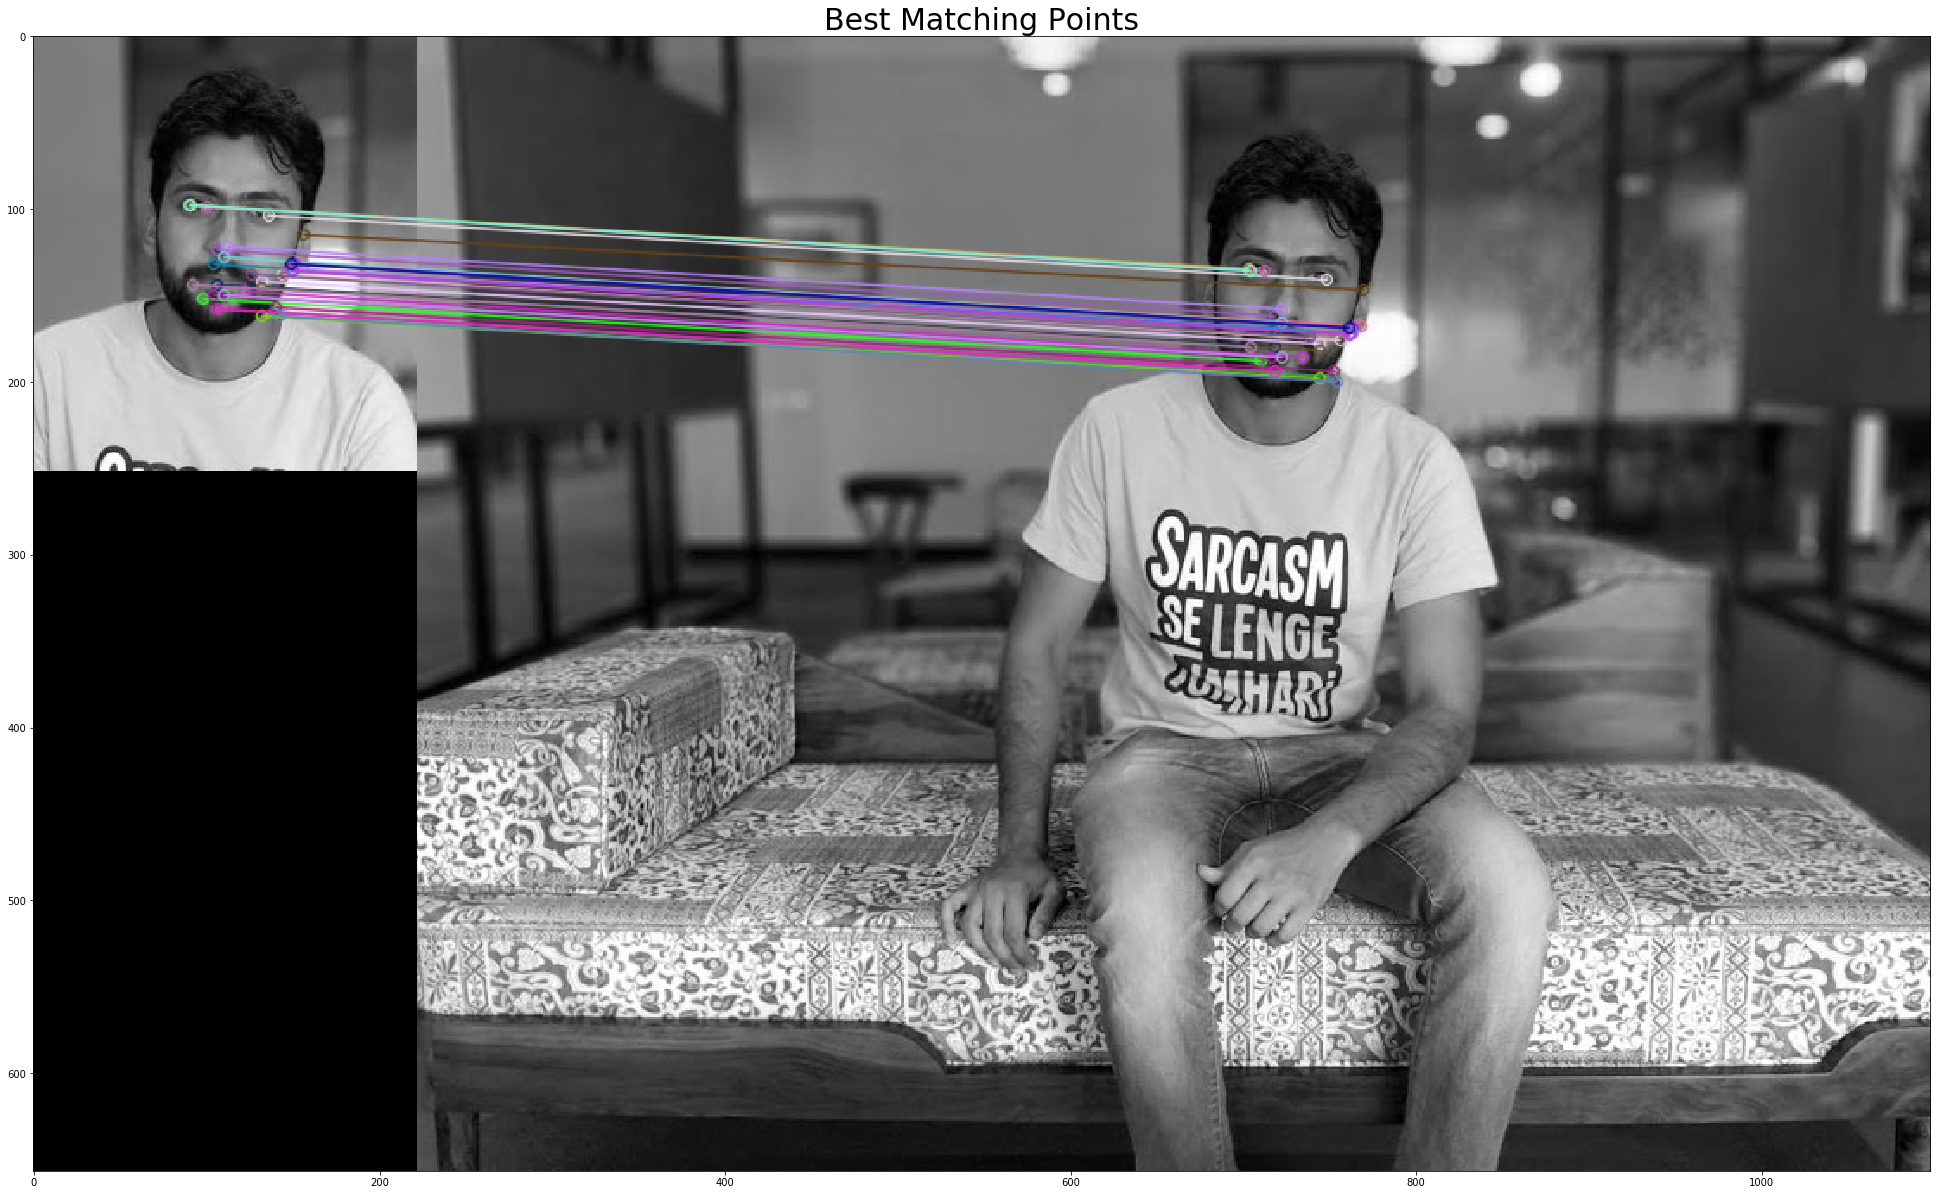

Number of Keypoints Detected In The Training Image:  230
Number of Keypoints Detected In The Query Image:  4251

Number of Matching Keypoints Between The Training and Query Images:  230


In [5]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(descriptors_train, descriptors_query)

matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:30], query_gray, flags = 2)

plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()

print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))